In [2]:
import pandas as pd
import requests

In [3]:
# Open and read file
with open ('GitToken.txt') as file:
    token = file.read()
    
# Specify the Authorization code
headers = {"Authorization": 'Bearer ' + token}

In [4]:
# Function to use requests.post to make an API call
def run_query(query): 
    request = requests.post('https://api.github.com/graphql', json={'query': query}, headers=headers)
    if request.status_code == 200:
        return request.json()
    else:
        raise Exception("Query failed to run by returning code of {}. {}".format(request.status_code, query))

In [5]:
query = '''
{
  repositoryOwner(login: "pandas-dev") {
    login
    repository(name: "pandas") {
      id
      name
      createdAt
      updatedAt
      description
	  primaryLanguage {
        name
      }
      licenseInfo {
        spdxId
      }
    }
  }
}
'''

In [6]:
results = run_query(query)

------------
# Taking the query and turning it into a dataframe

In [7]:
data = results['data']['repositoryOwner']['repository']

In [8]:
data

{'id': 'MDEwOlJlcG9zaXRvcnk4NTgxMjc=',
 'name': 'pandas',
 'createdAt': '2010-08-24T01:37:33Z',
 'updatedAt': '2019-09-04T16:13:21Z',
 'description': 'Flexible and powerful data analysis / manipulation library for Python, providing labeled data structures similar to R data.frame objects, statistical functions, and much more',
 'primaryLanguage': {'name': 'Python'},
 'licenseInfo': {'spdxId': 'BSD-3-Clause'}}

In [9]:
data = [data]

In [10]:
data

[{'id': 'MDEwOlJlcG9zaXRvcnk4NTgxMjc=',
  'name': 'pandas',
  'createdAt': '2010-08-24T01:37:33Z',
  'updatedAt': '2019-09-04T16:13:21Z',
  'description': 'Flexible and powerful data analysis / manipulation library for Python, providing labeled data structures similar to R data.frame objects, statistical functions, and much more',
  'primaryLanguage': {'name': 'Python'},
  'licenseInfo': {'spdxId': 'BSD-3-Clause'}}]

In [11]:
df = pd.DataFrame(data)

In [12]:
df

,createdAt,description,id,licenseInfo,name,primaryLanguage,updatedAt
0,2010-08-24T01:37:33Z,Flexible and powerful data analysis / manipula...,MDEwOlJlcG9zaXRvcnk4NTgxMjc=,{'spdxId': 'BSD-3-Clause'},pandas,{'name': 'Python'},2019-09-04T16:13:21Z


----------
# Using group by to get the count of commits per month

In [13]:
commits_df = pd.read_pickle('pickles/cleaned_commits.pk1')

In [14]:
commits_group = commits_df.groupby('assocPR_closedAt')

In [15]:
commits_df.head()

,assocPR_author,assocPR_authorAssociation,assocPR_closedAt,assocPR_createdAt,assocPR_id,assocPR_number,assocPR_state,assocPR_title,assocPR_updatedAt,committer_company,committer_author,status_id,status_state
0,simonjayhawkins,MEMBER,2019-08-27 21:50:23+00:00,2019-08-27 12:50:17+00:00,MDExOlB1bGxSZXF1ZXN0MzExMzY3OTE4,28173.0,MERGED,TYPING: change to FrameOrSeries Alias in panda...,2019-08-28 11:34:26+00:00,innobi,WillAyd,MDY6U3RhdHVzODU4MTI3OmQ5MWZmYTY0MDdjMWJhZjZhZm...,SUCCESS
1,addisonlynch,CONTRIBUTOR,2019-08-27 21:39:04+00:00,2019-08-26 22:44:15+00:00,MDExOlB1bGxSZXF1ZXN0MzExMTI1MDc0,28158.0,MERGED,"CLN: Use ABC classes for isinstance checks, re...",2019-08-27 21:39:04+00:00,None,jbrockmendel,MDY6U3RhdHVzODU4MTI3OjA4MGQ1N2VlOWZlZjkyNzU1MT...,SUCCESS
2,simonjayhawkins,MEMBER,2019-08-27 21:32:41+00:00,2019-08-24 19:07:08+00:00,MDExOlB1bGxSZXF1ZXN0MzEwNjM0NDQ1,28128.0,MERGED,TYPING: check-untyped-defs for util._decorators,2019-08-28 11:35:15+00:00,innobi,WillAyd,MDY6U3RhdHVzODU4MTI3OmJkOGRiZjkwNmU0MzUyNTY3MD...,SUCCESS
3,charlesdong1991,CONTRIBUTOR,2019-08-27 14:09:42+00:00,2019-08-01 14:26:59+00:00,MDExOlB1bGxSZXF1ZXN0MzAzNDExNDc4,27696.0,MERGED,Replace with nested dict raises for overlappin...,2019-08-27 14:09:55+00:00,None,jschendel,MDY6U3RhdHVzODU4MTI3OjA0MWI2YjE4MGY4MTc1YjY0Mj...,SUCCESS
4,jbrockmendel,MEMBER,2019-08-26 23:52:45+00:00,2019-08-15 22:55:38+00:00,MDExOlB1bGxSZXF1ZXN0MzA3ODg1MDE2,27941.0,MERGED,"CLN: internals.blocks cleanup, typing",2019-08-27 20:48:21+00:00,innobi,WillAyd,MDY6U3RhdHVzODU4MTI3OjQ5ZDIwMTk3MjNiMDA4OWJkMz...,SUCCESS


In [16]:
commits_count_month = commits_df['assocPR_closedAt'].groupby(commits_df.assocPR_closedAt.dt.to_period("M")).agg('count')

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


In [17]:
commits_count_month

assocPR_closedAt
2011-06      1
2011-08      1
2011-11      2
2012-01     22
2012-02     33
2012-03      3
2012-04     35
2012-05      4
2012-07     28
2012-08      5
2012-09     24
2012-10     59
2012-11     85
2012-12     97
2013-01     32
2013-02     59
2013-03    164
2013-04    193
2013-05    146
2013-06    231
2013-07    146
2013-08    102
2013-09    198
2013-10    224
2013-11     98
2013-12     82
2014-01    227
2014-02    169
2014-03     97
2014-04    109
          ... 
2017-03    238
2017-04    127
2017-05    129
2017-06     78
2017-07    121
2017-08    278
2017-09    133
2017-10    149
2017-11    232
2017-12    205
2018-01    166
2018-02    194
2018-03    306
2018-04     90
2018-05    161
2018-06    145
2018-07    198
2018-08    139
2018-09    128
2018-10    213
2018-11    293
2018-12    277
2019-01    244
2019-02    142
2019-03    170
2019-04    137
2019-05    145
2019-06    225
2019-07    218
2019-08    175
Freq: M, Name: assocPR_closedAt, Length: 94, dtype: int64

In [18]:
commits_count_month.plot()

In [19]:
df['comits_count/month'] = [commits_count_month]

----------
# Using group by to get counts of pull requests per month 

In [20]:
pr_df = pd.read_pickle('pickles/clean_pullRequest_df.pk1')

In [21]:
pr_df.head()

,author,authorAssociation,bodyText,comments,createdAt,mergedBy,resourcePath,state,title,updatedAt,closedAt,pr_duration,enAuthorASsociation,company,file_count,comment_count
0,None,NONE,I have added hist method to frame.py and serie...,"[{'author': {'login': 'wesm', 'company': '@urs...",2011-02-22 08:07:35+00:00,None,/pandas-dev/pandas/pull/35,CLOSED,Added hist method and added auto_x argument to...,2011-02-27T05:17:56Z,2011-02-25 01:41:56+00:00,2 days 17:34:21,1,None,3,2
1,None,NONE,"Added two methods in frame.py: describe, which...","[{'author': {'login': 'wesm', 'company': '@urs...",2011-03-06 01:35:53+00:00,wesm,/pandas-dev/pandas/pull/37,MERGED,added describe and scoreatpercentile in frame.py,2014-07-03T19:26:14Z,2011-03-18 20:00:26+00:00,12 days 18:24:33,1,None,1,4
2,None,NONE,So the results of DataFrame.toString() without...,"[{'author': {'login': 'wesm', 'company': '@urs...",2011-03-22 19:27:42+00:00,wesm,/pandas-dev/pandas/pull/38,MERGED,changed _pfixed in common.py to add a leading ...,2011-03-22T23:47:23Z,2011-03-22 20:01:36+00:00,0 days 00:33:54,1,None,1,2
3,dieterv77,CONTRIBUTOR,"Hi Wes, i've been following your pandas work f...","[{'author': {'login': 'wesm', 'company': '@urs...",2011-06-29 00:59:24+00:00,wesm,/pandas-dev/pandas/pull/55,MERGED,Minor change to CleanCommand so build works wi...,2011-06-29T02:07:07Z,2011-06-29 02:06:48+00:00,0 days 01:07:24,2,None,1,1
4,jberka,CONTRIBUTOR,Starting small...\nIt looks like the .h5 files...,"[{'author': {'login': 'wesm', 'company': '@urs...",2011-08-06 08:02:19+00:00,wesm,/pandas-dev/pandas/pull/89,MERGED,Fix for issue #80,2014-07-17T17:26:50Z,2011-08-07 16:15:41+00:00,1 days 08:13:22,2,None,1,1


In [22]:
pr_count_month = pr_df['createdAt'].groupby(pr_df.createdAt.dt.to_period("M")).agg('count')

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


In [23]:
[pr_count_month]

[createdAt
 2011-02      1
 2011-03      2
 2011-06      1
 2011-08      3
 2011-09     10
 2011-10     15
 2011-11     15
 2011-12     21
 2012-01     39
 2012-02     17
 2012-03     21
 2012-04     23
 2012-05     41
 2012-06     41
 2012-07     19
 2012-08     13
 2012-09     41
 2012-10     34
 2012-11     95
 2012-12     64
 2013-01     45
 2013-02     57
 2013-03    131
 2013-04     91
 2013-05    105
 2013-06    159
 2013-07    138
 2013-08    105
 2013-09    180
 2013-10    162
           ... 
 2017-03    165
 2017-04    182
 2017-05    190
 2017-06     90
 2017-07    147
 2017-08    125
 2017-09    167
 2017-10    181
 2017-11    284
 2017-12    233
 2018-01    218
 2018-02    235
 2018-03    428
 2018-04    129
 2018-05    170
 2018-06    184
 2018-07    241
 2018-08    196
 2018-09    179
 2018-10    305
 2018-11    323
 2018-12    299
 2019-01    324
 2019-02    206
 2019-03    241
 2019-04    157
 2019-05    184
 2019-06    296
 2019-07    280
 2019-08    335
 Freq: M, Nam

In [24]:
df['pr_count/month'] = [pr_count_month]
df

,createdAt,description,id,licenseInfo,name,primaryLanguage,updatedAt,comits_count/month,pr_count/month
0,2010-08-24T01:37:33Z,Flexible and powerful data analysis / manipula...,MDEwOlJlcG9zaXRvcnk4NTgxMjc=,{'spdxId': 'BSD-3-Clause'},pandas,{'name': 'Python'},2019-09-04T16:13:21Z,assocPR_closedAt 2011-06 1 2011-08 1...,createdAt 2011-02 1 2011-03 2 2011-0...


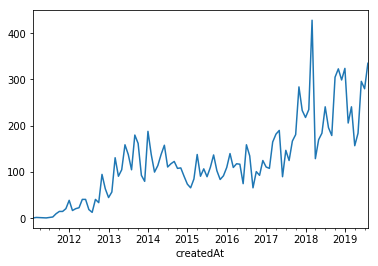

In [25]:
df['pr_count/month'][0].plot()

--------
# Star count per month using groupby

In [26]:
star_df = pd.read_pickle('pickles/clean_star_df.pk1')
star_df.head()

,starredAt
0,2013-02-09 23:12:29+00:00
1,2013-01-09 20:36:05+00:00
2,2013-01-25 02:59:12+00:00
3,2013-02-10 13:03:41+00:00
4,2013-02-10 19:14:58+00:00


In [27]:
star_count_month = star_df['starredAt'].groupby(star_df.starredAt.dt.to_period('M')).agg('count')

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


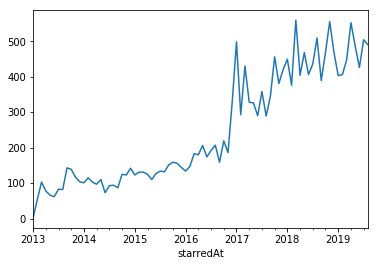

In [28]:
star_count_month.plot()

In [29]:
df['star_count/month'] = [star_count_month]

In [30]:
df

,createdAt,description,id,licenseInfo,name,primaryLanguage,updatedAt,comits_count/month,pr_count/month,star_count/month
0,2010-08-24T01:37:33Z,Flexible and powerful data analysis / manipula...,MDEwOlJlcG9zaXRvcnk4NTgxMjc=,{'spdxId': 'BSD-3-Clause'},pandas,{'name': 'Python'},2019-09-04T16:13:21Z,assocPR_closedAt 2011-06 1 2011-08 1...,createdAt 2011-02 1 2011-03 2 2011-0...,starredAt 2013-01 2 2013-02 54 2013-0...


--------------
# using groupby to get count of issues per month

In [31]:
issues_df = pd.read_pickle('pickles/clean_closed_issues_df.pk1')

In [32]:
issues_df.head()

,author,authorAssociation,bodyText,closedAt,comments,createdAt,number,state,title,updatedAt,comment_count,company,issue_duration,enAuthorAssociation
7,abbazs,NONE,I would like to request a method similar to Gr...,2019-08-25 15:48:21+00:00,"[{'author': {'login': 'simonjayhawkins', 'comp...",2019-08-25 13:34:22+00:00,28138,CLOSED,Get nth group of groups,2019-08-25 15:48:21+00:00,2,None,02:13:59,1
8,bmoscon,CONTRIBUTOR,Problem description\r\nThis docstring https://...,2019-08-25 15:56:16+00:00,[],2019-08-25 13:08:52+00:00,28136,CLOSED,Docstring in pickle_compat.py out of date,2019-08-25 15:56:16+00:00,0,@glg,02:47:24,2
10,farziengineer,NONE,"Hi,\r\nWhy is there no support for inplace = T...",2019-08-25 21:41:33+00:00,"[{'author': {'login': 'WillAyd', 'company': 'i...",2019-08-25 04:15:12+00:00,28132,CLOSED,Inplace support for add_suffix and add_prefix,2019-08-25 21:41:33+00:00,1,Nissan Digital,17:26:21,1
12,appleyuchi,NONE,Problem description\r\nI want a prrogress bar ...,2019-08-24 09:05:19+00:00,"[{'author': {'login': 'jreback', 'company': No...",2019-08-24 08:39:37+00:00,28126,CLOSED,progress bar for read_csv is needed,2019-08-24 09:05:20+00:00,1,Peking Universty,00:25:42,1
18,TomAugspurger,CONTRIBUTOR,I'm not sure whether supporting this is worth ...,2019-08-23 20:36:56+00:00,"[{'author': {'login': 'jbrockmendel', 'company...",2019-08-23 15:14:06+00:00,28116,CLOSED,DataFrame.eval doesn't handle Ellipses,2019-08-23 20:36:56+00:00,2,@ContinuumIO,05:22:50,2


In [33]:
issues_count_month = issues_df['createdAt'].groupby(issues_df.createdAt.dt.to_period('M')).agg('count')

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


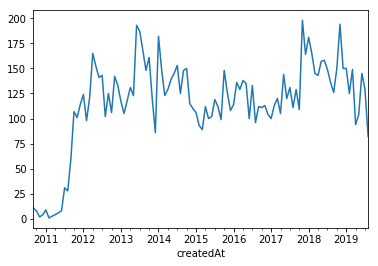

In [34]:
issues_count_month.plot()

In [35]:
df['issues_count/month'] = [issues_count_month]

In [36]:
df

,createdAt,description,id,licenseInfo,name,primaryLanguage,updatedAt,comits_count/month,pr_count/month,star_count/month,issues_count/month
0,2010-08-24T01:37:33Z,Flexible and powerful data analysis / manipula...,MDEwOlJlcG9zaXRvcnk4NTgxMjc=,{'spdxId': 'BSD-3-Clause'},pandas,{'name': 'Python'},2019-09-04T16:13:21Z,assocPR_closedAt 2011-06 1 2011-08 1...,createdAt 2011-02 1 2011-03 2 2011-0...,starredAt 2013-01 2 2013-02 54 2013-0...,createdAt 2010-09 11 2010-10 8 2010-1...


------------
# Using pull requests df to gather number of contributors and memebers for each month

In [83]:
pr_count_month_mem = pr_df[pr_df['authorAssociation']=='MEMBER'].groupby(pr_df.createdAt.dt.to_period("M"))

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


In [85]:
pr_count_month_mem.authorAssociation.value_counts()[:10]

createdAt  authorAssociation
2011-12    MEMBER                1
2012-07    MEMBER                1
2012-09    MEMBER                2
2012-10    MEMBER                2
2013-01    MEMBER                2
2013-02    MEMBER                1
2013-03    MEMBER                2
2013-04    MEMBER                5
2013-05    MEMBER               36
2013-06    MEMBER               55
Name: authorAssociation, dtype: int64

In [86]:
pr_count_month_con = pr_df[pr_df['authorAssociation']=='CONTRIBUTOR'].groupby(pr_df.createdAt.dt.to_period("M"))

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


In [90]:
pr_count_month_con.authorAssociation.value_counts()[:10]

createdAt  authorAssociation
2011-06    CONTRIBUTOR           1
2011-08    CONTRIBUTOR           2
2011-09    CONTRIBUTOR           8
2011-10    CONTRIBUTOR          14
2011-11    CONTRIBUTOR          12
2011-12    CONTRIBUTOR          18
2012-01    CONTRIBUTOR          36
2012-02    CONTRIBUTOR          16
2012-03    CONTRIBUTOR          20
2012-04    CONTRIBUTOR          22
Name: authorAssociation, dtype: int64

In [92]:
pr_count_month_non = pr_df[pr_df['authorAssociation']=='NONE'].groupby(pr_df.createdAt.dt.to_period("M"))

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


In [133]:
non = pr_count_month_non.authorAssociation.value_counts()/df['pr_count/month'][0]
non[:10]

0.3333333333333333

In [105]:
mem = pr_count_month_mem.authorAssociation.value_counts()/df['pr_count/month'][0]

In [106]:
con = pr_count_month_con.authorAssociation.value_counts()/df['pr_count/month'][0]

In [107]:
print('None',non.shape,'\nmem', mem.shape,'\ncon', con.shape)

None (99,) 
mem (84,) 
con (98,)


In [139]:
pd.DataFrame([mem, con, non]).T

0         1         2
createdAt authorAssociation                              
2011-02   NONE                    NaN       NaN  1.000000
2011-03   NONE                    NaN       NaN  1.000000
2011-06   CONTRIBUTOR             NaN  1.000000       NaN
2011-08   CONTRIBUTOR             NaN  0.666667       NaN
          NONE                    NaN       NaN  0.333333
2011-09   CONTRIBUTOR             NaN  0.800000       NaN
          NONE                    NaN       NaN  0.200000
2011-10   CONTRIBUTOR             NaN  0.933333       NaN
          NONE                    NaN       NaN  0.066667
2011-11   CONTRIBUTOR             NaN  0.800000       NaN
          NONE                    NaN       NaN  0.200000
2011-12   CONTRIBUTOR             NaN  0.857143       NaN
          MEMBER             0.047619       NaN       NaN
          NONE                    NaN       NaN  0.095238
2012-01   CONTRIBUTOR             NaN  0.923077       NaN
          NONE                    NaN       NaN  0.076923
2012-02   CONTRIBUTOR             NaN  0.941176       NaN
          NONE                    NaN       NaN  0.058824
2012-03   CONTRIBUTOR             NaN  0.952381       NaN
          NONE                    NaN       NaN  0.047619
2012-04   CONTRIBUTOR             NaN  0.956522       NaN
          NONE                    NaN       NaN  0.043478
2012-05   CONTRIBUTOR             NaN  0.975610       NaN
          NONE                    NaN       NaN  0.024390
2012-06   CONTRIBUTOR             NaN  0.975610       NaN
          NONE                    NaN       NaN  0.024390
2012-07   CONTRIBUTOR             NaN  0.842105       NaN
          MEMBER             0.052632       NaN       NaN
          NONE                    NaN       NaN  0.105263
2012-08   CONTRIBUTOR             NaN  0.846154       NaN
...                               ...       ...       ...
2018-11   CONTRIBUTOR             NaN  0.541796       NaN
          MEMBER             0.414861       NaN       NaN
          NONE                    NaN       NaN  0.043344
2018-12   CONTRIBUTOR             NaN  0.478261       NaN
          MEMBER             0.464883       NaN       NaN
          NONE                    NaN       NaN  0.056856
2019-01   CONTRIBUTOR             NaN  0.475309       NaN
          MEMBER             0.441358       NaN       NaN
          NONE                    NaN       NaN  0.083333
2019-02   CONTRIBUTOR             NaN  0.553398       NaN
          MEMBER             0.257282       NaN       NaN
          NONE                    NaN       NaN  0.189320
2019-03   CONTRIBUTOR             NaN  0.551867       NaN
          MEMBER             0.336100       NaN       NaN
          NONE                    NaN       NaN  0.112033
2019-04   CONTRIBUTOR             NaN  0.605096       NaN
          MEMBER             0.299363       NaN       NaN
          NONE                    NaN       NaN  0.095541
2019-05   CONTRIBUTOR             NaN  0.646739       NaN
          MEMBER             0.309783       NaN       NaN
          NONE                    NaN       NaN  0.043478
2019-06   CONTRIBUTOR             NaN  0.459459       NaN
          MEMBER             0.466216       NaN       NaN
          NONE                    NaN       NaN  0.074324
2019-07   CONTRIBUTOR             NaN  0.435714       NaN
          MEMBER             0.478571       NaN       NaN
          NONE                    NaN       NaN  0.085714
2019-08   CONTRIBUTOR             NaN  0.370149       NaN
          MEMBER             0.325373       NaN       NaN
          NONE                    NaN       NaN  0.304478

[281 rows x 3 columns]